## Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [10]:
# from google.colab import files
# uploaded = files.upload()

from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/UberDataset.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# from google.colab import files

# uploaded = files.upload()
df = pd.read_csv('UberDataset.csv')

In [12]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [13]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [15]:
df.shape

(1156, 7)

In [16]:
df.isnull().sum()

,0
START_DATE,0
END_DATE,1
CATEGORY,1
START,1
STOP,1
MILES,0
PURPOSE,503


In [17]:
df['CATEGORY'].value_counts()

,count
CATEGORY,
Business,1078
Personal,77


In [18]:
df['START'].value_counts()

,count
START,
Cary,201
Unknown Location,148
Morrisville,85
Whitebridge,68
Islamabad,57
...,...
Krendle Woods,1
Fuquay-Varina,1
Wake Co.,1


In [19]:
df['STOP'].value_counts()

,count
STOP,
Cary,203
Unknown Location,149
Morrisville,84
Whitebridge,65
Islamabad,58
...,...
El Cerrito,1
Fuquay-Varina,1
Wake Co.,1


In [20]:
locations = df['START'].value_counts().index
locations = list(filter(lambda loc: not re.match(r'^[A-Za-z\s]+$', loc), locations))
locations

['Kar?chi', 'R?walpindi', "Hell's Kitchen", 'Fuquay-Varina', 'Wake Co.']

In [21]:
df['PURPOSE'].value_counts()

,count
PURPOSE,
Meeting,187
Meal/Entertain,160
Errand/Supplies,128
Customer Visit,101
Temporary Site,50
Between Offices,18
Moving,4
Airport/Travel,3
Commute,1


## Data Cleaning

In [22]:
df.fillna({'PURPOSE':'Unknown'},inplace=True)
df.dropna(inplace=True)

In [23]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

In [24]:
df[['START','STOP']] = df[['START','STOP']].applymap(lambda x:x.replace('?','a'))

In [25]:
df['DATE'] = df['START_DATE'].dt.date

In [26]:
df['HOURS'] = df['START_DATE'].dt.hour

In [27]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,HOURS
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


## EDA

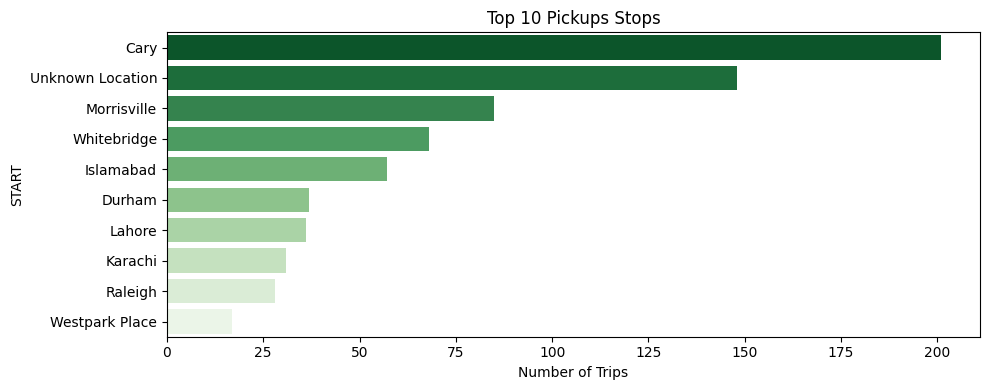

In [28]:
top_pickups = df['START'].value_counts().head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=top_pickups.values, y=top_pickups.index, palette='Greens_r')
plt.xlabel('Number of Trips')
plt.title('Top 10 Pickups Stops')
plt.tight_layout()
plt.show()

In [30]:
print("Trip Distance Stats:")
print(df['MILES'].describe())

Trip Distance Stats:
count    1155.000000
mean       10.566840
std        21.579106
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: MILES, dtype: float64


## Rides per Hour

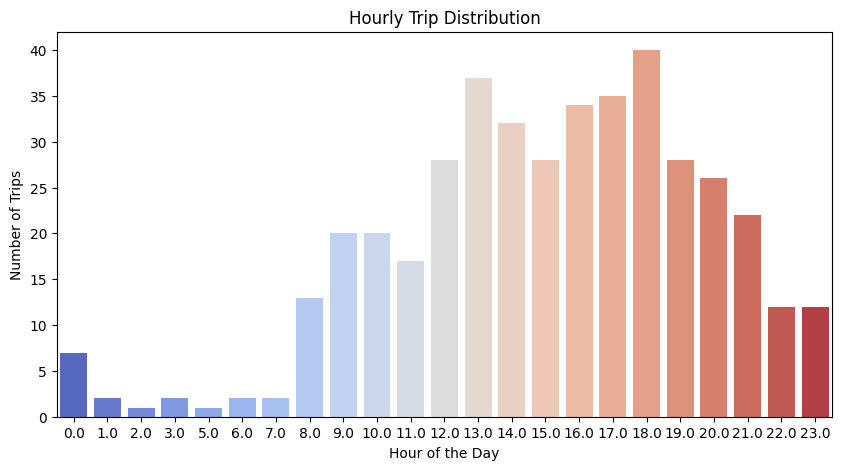

In [31]:
plt.figure(figsize=(10, 5)) #
sns.countplot(x=df['HOURS'],palette='coolwarm')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Hourly Trip Distribution')
plt.show()

## How many total Uber trips are there in the dataset?

In [33]:
print("Total Trips:", len(df))

Total Trips: 1155


## What is the distribution of trips by CATEGORY (Business vs Personal)?

<Axes: title={'center': 'Trip Category Distribution'}, xlabel='CATEGORY'>

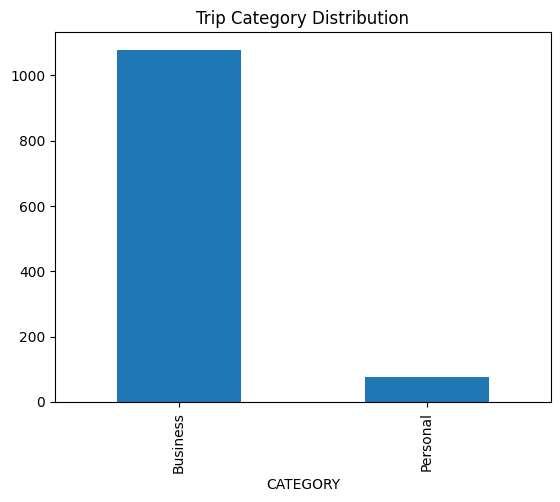

In [35]:
df['CATEGORY'].value_counts().plot(kind='bar', title='Trip Category Distribution') #

## How many unique cities or locations are covered?

In [51]:
print("Unique Start locations:", df['START'].nunique())
print("Unique Stop locations:", df['STOP'].nunique())

Unique Start locations: 175
Unique Stop locations: 186


## Which are the top 5 purposes of Uber trips?

<Axes: title={'center': 'Top 5 Trip Purposes'}, xlabel='PURPOSE'>

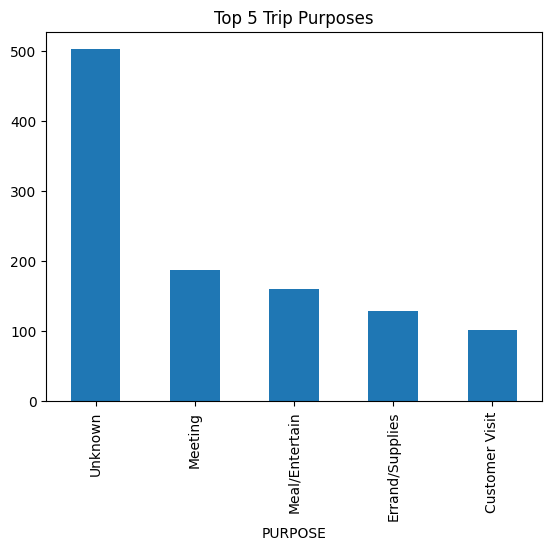

In [36]:
df['PURPOSE'].value_counts().head(5).plot(kind='bar', title='Top 5 Trip Purposes')

## How do Uber rides vary month-wise?

<Axes: title={'center': 'Monthly Ride Count'}, xlabel='Month'>

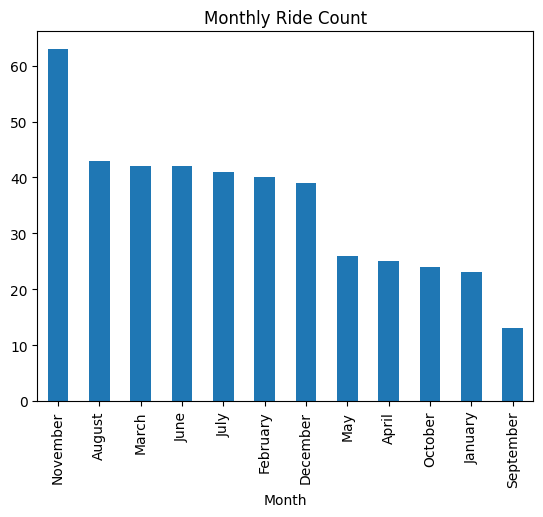

In [52]:
df['Month'] = df['START_DATE'].dt.month_name()
df['Month'].value_counts().plot(kind='bar', title='Monthly Ride Count')

## Which purpose of trip has the highest average distance

In [44]:
df.groupby('PURPOSE')['MILES'].mean().sort_values(ascending=False).head()

,MILES
PURPOSE,
Commute,180.200000
Customer Visit,20.688119
Meeting,15.247594
Charity ($),15.100000
Between Offices,10.944444


## Which days of the week are most popular for Uber rides?

<Axes: xlabel='Weekday', ylabel='count'>

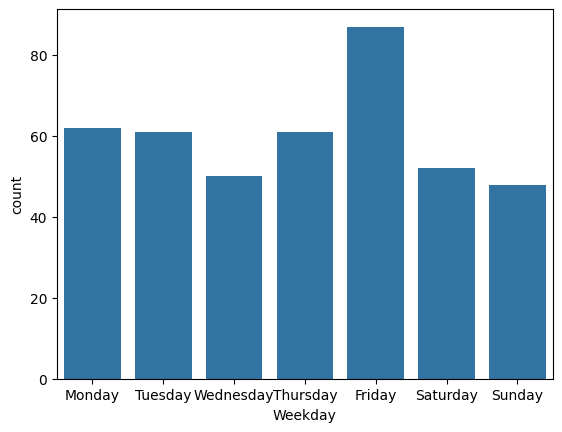

In [38]:
df['Weekday'] = df['START_DATE'].dt.day_name()
sns.countplot(x='Weekday', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

## What is the average, minimum, and maximum trip distance?

In [39]:
print(df['MILES'].describe())

count    1155.000000
mean       10.566840
std        21.579106
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: MILES, dtype: float64


## What is the total distance covered for each trip purpose?

<Axes: title={'center': 'Total Miles by Purpose'}, xlabel='PURPOSE'>

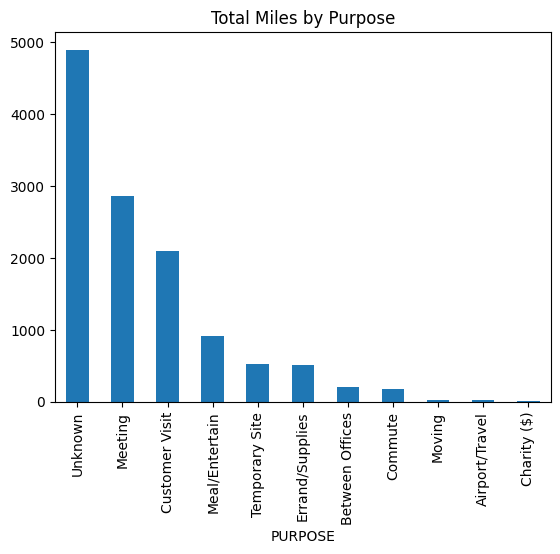

In [40]:
df.groupby('PURPOSE')['MILES'].sum().sort_values(ascending=False).plot(kind='bar', title='Total Miles by Purpose')